## 타겟 데이터 관찰

In [36]:
import geopandas as gpd
gdf = gpd.read_file('../data/3.대상구역도(하남교산).geojson')
gdf

,zoneCode,zoneName,blockName,blockType,geometry
0,41450MX2019001,하남교산 공공주택지구,경5,녹지,"POLYGON ((127.18516 37.49968, 127.18522 37.499..."
1,41450MX2019001,하남교산 공공주택지구,복4,사회복지시설,"POLYGON ((127.18821 37.50262, 127.18817 37.502..."
2,41450MX2019001,하남교산 공공주택지구,복5,사회복지시설,"POLYGON ((127.21798 37.53235, 127.21786 37.532..."
3,41450MX2019001,하남교산 공공주택지구,복6,사회복지시설,"POLYGON ((127.20431 37.52177, 127.20434 37.521..."
4,41450MX2019001,하남교산 공공주택지구,복8,사회복지시설,"POLYGON ((127.19803 37.51356, 127.19782 37.513..."
...,...,...,...,...,...
736,41450MX2019001,하남교산 공공주택지구,근생3-2,근린생활시설용지,"POLYGON ((127.20631 37.52285, 127.20619 37.522..."
737,41450MX2019001,하남교산 공공주택지구,근생3-3,근린생활시설용지,"POLYGON ((127.20440 37.52106, 127.20430 37.521..."
738,41450MX2019001,하남교산 공공주택지구,근생3-5,근린생활시설용지,"POLYGON ((127.20380 37.52007, 127.20373 37.520..."
739,41450MX2019001,하남교산 공공주택지구,체1,체육시설,"POLYGON ((127.19703 37.52797, 127.19803 37.527..."


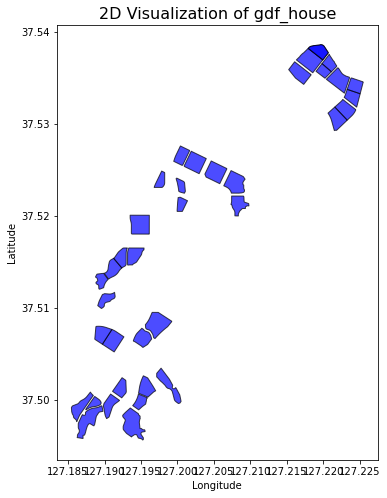

In [37]:
import matplotlib.pyplot as plt

# 공동주택만 관찰하기
gdf_house = gdf[gdf['blockType'] == '공동주택']

# 2차원 지도 시각화
gdf_house.plot( # 
    figsize=(10, 8),
    color='blue',  # 색상 지정
    edgecolor='black',  # 경계선 색상
    alpha=0.7  # 투명도
)

# 그래프 꾸미기
plt.title("2D Visualization of gdf_house", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [39]:
import pandas as pd

# 공급 예정인 공동주택 정보 불러오기 (자체 생성)
df_lh = pd.read_csv('../data/타겟/교산_공동주택.csv')
df_lh

,blck_cd,건설호수,통합공임 포함,10평이상,20평이상,30평이상
0,S1,333,0,0,1,1
1,A1,965,1,1,0,0
2,A2,1115,0,0,1,0
3,A3,394,1,0,1,0
4,A4,666,1,1,0,0
5,A5,492,0,0,1,0
6,A6,769,1,0,1,0
7,A7,1605,1,1,0,0
8,A8,650,1,0,1,0
9,A9,525,1,1,0,0


In [40]:
import re

# 타겟 데이터로부터 공동 주택 정보만 불러오기
gdf_house = gdf[gdf['blockType']=='공동주택']

# 특수기호 제거 (정규표현식 사용)
gdf_house['blockName'] = gdf_house['blockName'].str.replace(r'[^\w\s]', '', regex=True)

# 데이터 결합
gdf_house = gdf_house[['blockName', 'geometry']].merge(df_lh, left_on='blockName', right_on='blck_cd', how='left')
gdf_house = gdf_house.drop('blck_cd', axis=1)
gdf_house = gdf_house.rename(columns={'건설호수' : '세대수'})
gdf_house

/opt/app-root/lib/python3.6/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,blockName,geometry,세대수,통합공임 포함,10평이상,20평이상,30평이상
0,A11,"POLYGON ((127.19541 37.51630, 127.19538 37.516...",715,1,0,1,0
1,S1,"POLYGON ((127.22083 37.53749, 127.22135 37.536...",333,0,0,1,1
2,B8,"POLYGON ((127.18989 37.51374, 127.18990 37.513...",295,0,0,0,1
3,B9,"POLYGON ((127.19111 37.50762, 127.19120 37.507...",674,0,0,0,1
4,C2,"POLYGON ((127.19925 37.50853, 127.19865 37.507...",771,0,0,0,1
5,C3,"POLYGON ((127.19465 37.49848, 127.19465 37.498...",739,0,0,0,1
6,A5,"POLYGON ((127.22504 37.53327, 127.22456 37.531...",492,0,0,1,0
7,A7,"POLYGON ((127.20894 37.52430, 127.20896 37.524...",1605,1,1,0,0
8,A8,"POLYGON ((127.20910 37.52209, 127.20911 37.522...",650,1,0,1,0
9,B1,"POLYGON ((127.21833 37.53534, 127.21810 37.535...",653,0,0,0,1


In [ ]:
# 공동주택 정보 내보내기
gdf_house.to_csv('../data/타겟/교산_신설공동주택정보.csv', index=True)

## 격자 데이터 정리

In [42]:
import geopandas as gpd
import numpy as np

# 블록코드가 매핑된 하남시 격자 데이터 불러오기
target_grid = gpd.read_file('../data/타겟/타겟_1차.shp')

# 필요한 컬럼 불러오기
target_grid = target_grid[['gid', 'blck_cd', 'geometry']]

# 'blck_cd'의 길이가 4 이하인 경우 None으로 설정
target_grid['blck_cd'] = np.where(target_grid['blck_cd'].astype(str).str.len() > 4, target_grid['blck_cd'], None)
target_grid

,gid,blck_cd,geometry
0,다사710491,None,"POLYGON ((127.17173 37.54077, 127.17173 37.541..."
1,다사732511,None,"POLYGON ((127.19656 37.55886, 127.19656 37.559..."
2,다사703464,None,"POLYGON ((127.16392 37.51641, 127.16391 37.517..."
3,다사734504,C00405,"POLYGON ((127.19885 37.55256, 127.19885 37.553..."
4,다사731458,None,"POLYGON ((127.19562 37.51109, 127.19562 37.511..."
...,...,...,...
9629,다사755436,None,"POLYGON ((127.22285 37.49133, 127.22285 37.492..."
9630,다사766500,None,"POLYGON ((127.23509 37.54904, 127.23509 37.549..."
9631,다사744460,None,"POLYGON ((127.21033 37.51293, 127.21032 37.513..."
9632,다사771452,None,"POLYGON ((127.24090 37.50579, 127.24090 37.506..."


In [44]:
import geopandas as gpd
import pandas as pd
from tqdm import tqdm

# 가정: target_grid와 gdf_house는 각각 GeoDataFrame 형태로 존재

# 'blck_cd'가 None인 경우에만 처리를 하도록 target_grid에서 'blck_cd'가 None인 행을 찾음
target_grid_none = target_grid[target_grid['blck_cd'].isna()]

# gdf_house의 각 블록에 대해 tqdm을 사용하여 진행 상황을 확인할 수 있도록 함
for idx, block in tqdm(gdf_house.iterrows(), total=len(gdf_house), desc="Processing gdf_house blocks"):
    # 현재 gdf_house의 block geometry
    block_geom = block['geometry']
    
    # target_grid_none의 각 격자에 대해 겹치는 부분이 있다면
    for tg_idx, target in target_grid_none.iterrows():
        # 현재 target_grid 격자의 geometry
        target_geom = target['geometry']
        
        # 겹치는 부분이 있다면
        if block_geom.intersects(target_geom):
            # 겹치는 부분의 넓이를 계산 (intersection)
            intersection = block_geom.intersection(target_geom)
            intersection_area = intersection.area
            
            # 겹치는 부분의 넓이가 있을 경우, 기존 'blck_cd'가 None이면 현재 blockName을 넣음
            if target_grid.loc[tg_idx, 'blck_cd'] is None:
                target_grid.loc[tg_idx, 'blck_cd'] = block['blockName']
            else:
                # 이미 값이 있다면, 더 넓은 영역을 가진 blockName을 선택
                existing_geom = gdf_house[gdf_house['blockName'] == target_grid.loc[tg_idx, 'blck_cd']].iloc[0]['geometry']
                existing_intersection = existing_geom.intersection(target_geom)
                existing_area = existing_intersection.area
                
                # 더 넓은 블록 영역을 가진 blockName으로 업데이트
                if intersection_area > existing_area:
                    target_grid.loc[tg_idx, 'blck_cd'] = block['blockName']

# 결과 확인
print(target_grid)

Processing gdf_house blocks: 100%|██████████| 38/38 [00:40<00:00,  1.07s/it]

           gid blck_cd                                           geometry
0     다사710491    None  POLYGON ((127.17173 37.54077, 127.17173 37.541...
1     다사732511    None  POLYGON ((127.19656 37.55886, 127.19656 37.559...
2     다사703464    None  POLYGON ((127.16392 37.51641, 127.16391 37.517...
3     다사734504  C00405  POLYGON ((127.19885 37.55256, 127.19885 37.553...
4     다사731458    None  POLYGON ((127.19562 37.51109, 127.19562 37.511...
...        ...     ...                                                ...
9629  다사755436    None  POLYGON ((127.22285 37.49133, 127.22285 37.492...
9630  다사766500    None  POLYGON ((127.23509 37.54904, 127.23509 37.549...
9631  다사744460    None  POLYGON ((127.21033 37.51293, 127.21032 37.513...
9632  다사771452    None  POLYGON ((127.24090 37.50579, 127.24090 37.506...
9633  다사702430    None  POLYGON ((127.16292 37.48576, 127.16292 37.486...

[9634 rows x 3 columns]


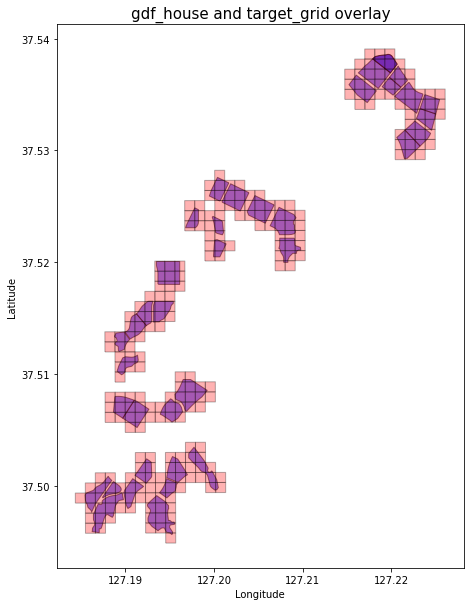

In [45]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 블록코드 길이가 4자 이하 (신설 공동주택)
target_grid_t = target_grid[target_grid['blck_cd'].astype(str).str.len()< 4]

# gdf_house와 target_grid가 이미 GeoDataFrame이라고 가정

# gdf_house를 그리기
fig, ax = plt.subplots(figsize=(10, 10))  # 그래프 크기 조정

gdf_house.plot(ax=ax, color='blue', alpha=0.5, edgecolor='k')  # gdf_house는 파란색, alpha로 투명도 조정

# target_grid를 그 위에 겹쳐 그림
target_grid_t.plot(ax=ax, color='red', alpha=0.3, edgecolor='k')  # target_grid는 빨간색, alpha로 투명도 조정

# 제목과 기타 설정
ax.set_title("gdf_house and target_grid overlay", fontsize=15)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [ ]:
# 데이터 내보내기
target_grid.to_csv('../data/타겟/하남시_격자별_블록코드.csv', index=False)

## 지하철 데이터 처리

In [47]:
# 존재하는 하남 지하철역 데이터
df_sub1 = pd.read_csv('../data/2-6.하남시_지하철역.csv')
df_sub1 = df_sub1[['stn_nm', 'lon', 'lat']]
df_sub1

# 신설 지하철 좌표 불러오기
df_sub2 = pd.read_csv('../data/타겟/하남_신설_지하철.csv')
df_sub2['stn_nm']='신설'
df_sub2 = df_sub2[['stn_nm', 'lon', 'lat']]
df_sub2

# 데이터 결합 => 신설 예정까지 포함한 하남시 지하철 데이터 완성
df_sub = pd.concat([df_sub1, df_sub2])
df_sub

,stn_nm,lon,lat
0,미사,127.192979,37.563254
1,하남풍산,127.203871,37.552058
2,하남시청(덕풍∙신장),127.206391,37.541922
3,하남검단산,127.223445,37.539759
0,신설,127.202911,37.527782
1,신설,127.195059,37.510636
2,신설,127.153202,37.508718


In [49]:
# 데이터 내보내기
df_sub.to_csv('../data/타겟/하남_지하철.csv', index=False)

In [5]:
import pandas as pd 
df_sub = pd.read_csv('../data/타겟/하남_지하철.csv')
df_sub

,stn_nm,lon,lat
0,미사,127.192979,37.563254
1,하남풍산,127.203871,37.552058
2,하남시청(덕풍∙신장),127.206391,37.541922
3,하남검단산,127.223444,37.539759
4,신설,127.202911,37.527782
5,신설,127.195059,37.510636
6,신설,127.153202,37.508718


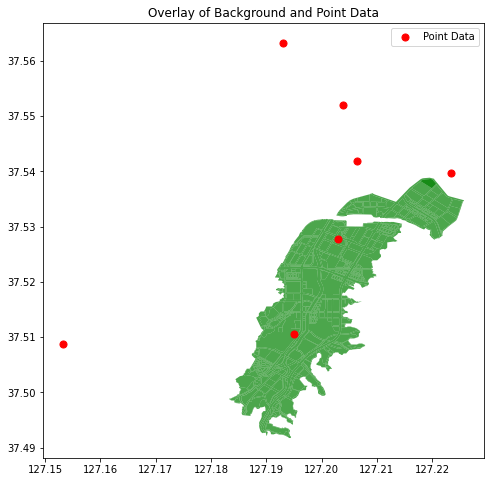

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# GeoDataFrame 생성 (df_sub의 lon, lat 정보를 포인트로 변환)
geometry = [Point(xy) for xy in zip(df_sub['lon'], df_sub['lat'])]
df_sub_gdf = gpd.GeoDataFrame(df_sub, geometry=geometry)

# 지도 시각화
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# 배경 지도 (gdf) 플롯
gdf.plot(
    ax=ax,
    color='green',
    edgecolor='None',
    alpha=0.7,
    label='Background Layer'  # 레이블 추가
)

# df_sub 데이터를 플롯 
df_sub_gdf.plot(
    ax=ax,
    color='red',  # 색상 지정
    markersize=50,  # 점 크기
    alpha=1.0,  # 투명도
    label='Point Data'  # 레이블 추가
)

# 레이블, 제목 및 범례 추가
ax.set_title("Overlay of Background and Point Data")
ax.legend()
plt.show()

## 학교데이터 정리

In [50]:
# 존재하는 하남시의 학교 데이터 불러오기
df_sch = pd.read_csv('../data/타겟/하남시학교.csv')
df_sch = df_sch[['학교급구분', '경도', '위도']]
df_sch.rename(columns={'school' : '학교급구분', '경도':'lon', '위도' : 'lat'}, inplace=True)

# 교산신도시에 생기는 신설 학교의 좌표 불러오기(자체생성)
df_sch_new = pd.read_csv('../data/타겟/교산신설학교좌표.csv')
df_sch_new.rename(columns={'school' : '학교급구분'}, inplace=True)
df_sch_new = df_sch_new[['학교급구분', 'lat', 'lon']]

# 유치원은 배제
df_sch_new = df_sch_new[df_sch_new['학교급구분'] != '유치원']

# 데이터결합
df_school = pd.concat([df_sch, df_sch_new]).reset_index(drop=True)
df_school

,학교급구분,lon,lat
0,중학교,127.148312,37.477211
1,중학교,127.202479,37.535497
2,고등학교,127.185618,37.560384
3,고등학교,127.183731,37.577757
4,초등학교,127.158339,37.485377
...,...,...,...
56,중학교,127.204628,37.522829
57,중학교,127.194467,37.516944
58,중학교,127.189440,37.501157
59,고등학교,127.210833,37.527802


In [28]:
df_school.to_csv('../data/타겟/하남_학교.csv', index=False)

In [29]:
import pandas as pd
df_school = pd.read_csv('../data/타겟/하남_학교.csv')
df_school

,학교급구분,lon,lat
0,중학교,127.148312,37.477211
1,중학교,127.202479,37.535497
2,고등학교,127.185618,37.560384
3,고등학교,127.183731,37.577757
4,초등학교,127.158339,37.485377
...,...,...,...
56,중학교,127.204628,37.522829
57,중학교,127.194467,37.516944
58,중학교,127.189440,37.501157
59,고등학교,127.210833,37.527802


No handles with labels found to put in legend.


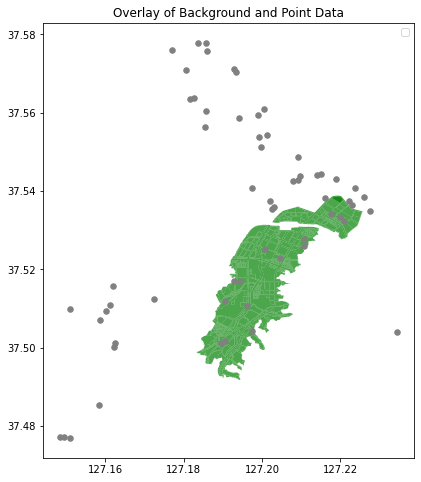

In [32]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# GeoDataFrame 생성 (df_school의 lon, lat 정보를 포인트로 변환)
geometry = [Point(xy) for xy in zip(df_school['lon'], df_school['lat'])]
df_school_gdf = gpd.GeoDataFrame(df_school, geometry=geometry)

# 지도 시각화
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# 배경 지도 (gdf) 플롯
gdf.plot(
    ax=ax,
    color='green',
    edgecolor='None',
    alpha=0.7,
    label='Background Layer'  # 레이블 추가
)

# df_school 데이터를 플롯 (앞쪽에 표시)
df_school_gdf.plot(
    ax=ax,
    color='gray',  # 색상 지정
    markersize=30,  # 점 크기
    alpha=1.0  # 투명도
)

# 레이블, 제목 및 범례 추가
ax.set_title("Overlay of Background and Point Data")
ax.legend()
plt.show()

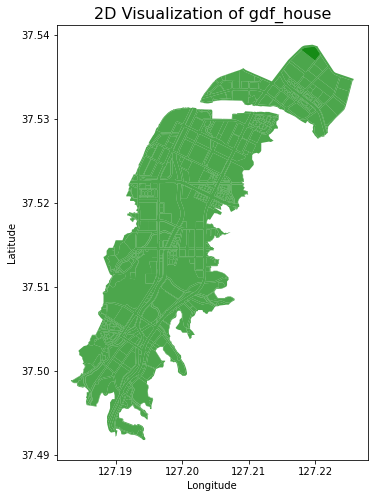

In [108]:
import matplotlib.pyplot as plt

# 2차원 지도 시각화
gdf.plot(
    figsize=(10, 8),
    color='green',  # 색상 지정
    edgecolor='None',  # 경계선 색상
    alpha=0.7  # 투명도
)

# 그래프 꾸미기
plt.title("2D Visualization of gdf_house", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

## 도로 데이터 정리
- 이미 존재하는 데이터와 자체 생성한 교산 데이터 합성
    - 자체 생성 : QGIS 상에서 셰이프파일 생성
- 교산에 근처의 도로 중 주요 도로는 그대로 활용

In [51]:
# 생성한 교산 도로 데이터 불러오기(기존 도로 데이터 중 교산의 큰 도로에 포함되는 것도 포함)
link_new = gpd.read_file('../data/타겟/교산신설.shp')
link_ex = gpd.read_file('../data/타겟/하남주요도로.shp')
link_ex = link_ex[['id', 'geometry']]
target_link = pd.concat([link_new, link_ex])
target_link

,id,geometry
0,1.000000e+00,"LINESTRING (127.18811 37.50839, 127.19034 37.5..."
1,2.000000e+00,"LINESTRING (127.19037 37.50796, 127.19271 37.5..."
2,3.000000e+00,"LINESTRING (127.19277 37.50713, 127.19597 37.5..."
3,4.000000e+00,"LINESTRING (127.19597 37.50515, 127.19724 37.5..."
4,5.000000e+00,"LINESTRING (127.19727 37.50320, 127.19861 37.5..."
...,...,...
134,9.227728e+10,"LINESTRING (127.20714 37.53182, 127.20704 37.5..."
135,5.727468e+10,"LINESTRING (127.21153 37.53709, 127.21072 37.5..."
136,5.727104e+10,"LINESTRING (127.21634 37.53297, 127.21673 37.5..."
137,9.227728e+10,"LINESTRING (127.20735 37.53097, 127.20768 37.5..."


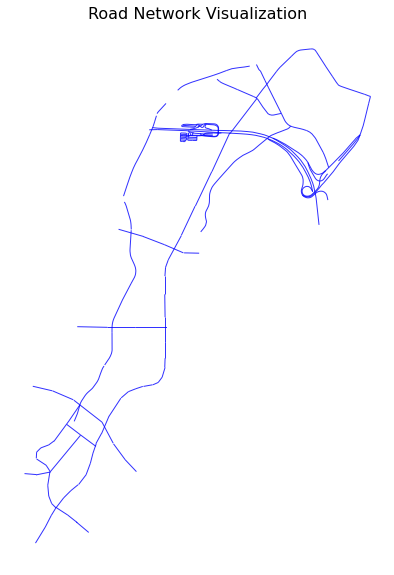

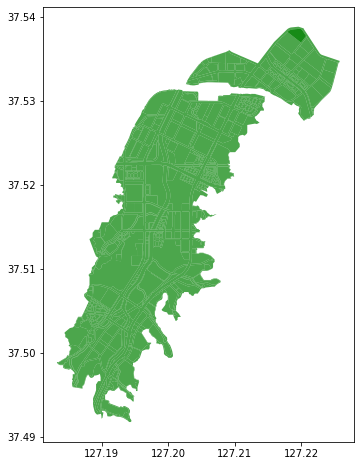

In [52]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 지도 시각화
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# 2차원 지도 시각화
gdf.plot(
    figsize=(10, 8),
    color='green',  # 색상 지정
    edgecolor='None',  # 경계선 색상
    alpha=0.7  # 투명도
)


# LineString 데이터를 지도에 플롯
target_link.plot(
    ax=ax,
    color='blue',  # 도로의 색상
    linewidth=1,  # 선의 두께
    alpha=0.8,  # 투명도
    legend=True  # 범례 추가 여부
)

# 그래프 제목 및 축 제거
ax.set_title("Road Network Visualization", fontsize=16)
ax.axis("off")  # 축 숨김

# 시각화 결과 출력
plt.show()

In [54]:
# 데이터 내보내기
target_link.to_csv('../data/타겟/교산_도로.csv', index=False)